In [44]:
import numpy as np
import pandas as pd
import seaborn as sn
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime, timedelta
import streamlit as st
from plotly.subplots import make_subplots


In [4]:
df = pd.read_csv("TSLA.csv")
df.head()

Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900

In [5]:
df.shape

(2416, 7)

In [6]:
summarized_data = df.describe()
summarized_data

Open         High          Low        Close    Adj Close  \
count  2416.000000  2416.000000  2416.000000  2416.000000  2416.000000   
mean    186.271147   189.578224   182.916639   186.403651   186.403651   
std     118.740163   120.892329   116.857591   119.136020   119.136020   
min      16.139999    16.629999    14.980000    15.800000    15.800000   
25%      34.342498    34.897501    33.587501    34.400002    34.400002   
50%     213.035004   216.745002   208.870002   212.960007   212.960007   
75%     266.450012   270.927513   262.102501   266.774994   266.774994   
max     673.690002   786.140015   673.520020   780.000000   780.000000   

             Volume  
count  2.416000e+03  
mean   5.572722e+06  
std    4.987809e+06  
min    1.185000e+05  
25%    1.899275e+06  
50%    4.578400e+06  
75%    7.361150e+06  
max    4.706500e+07

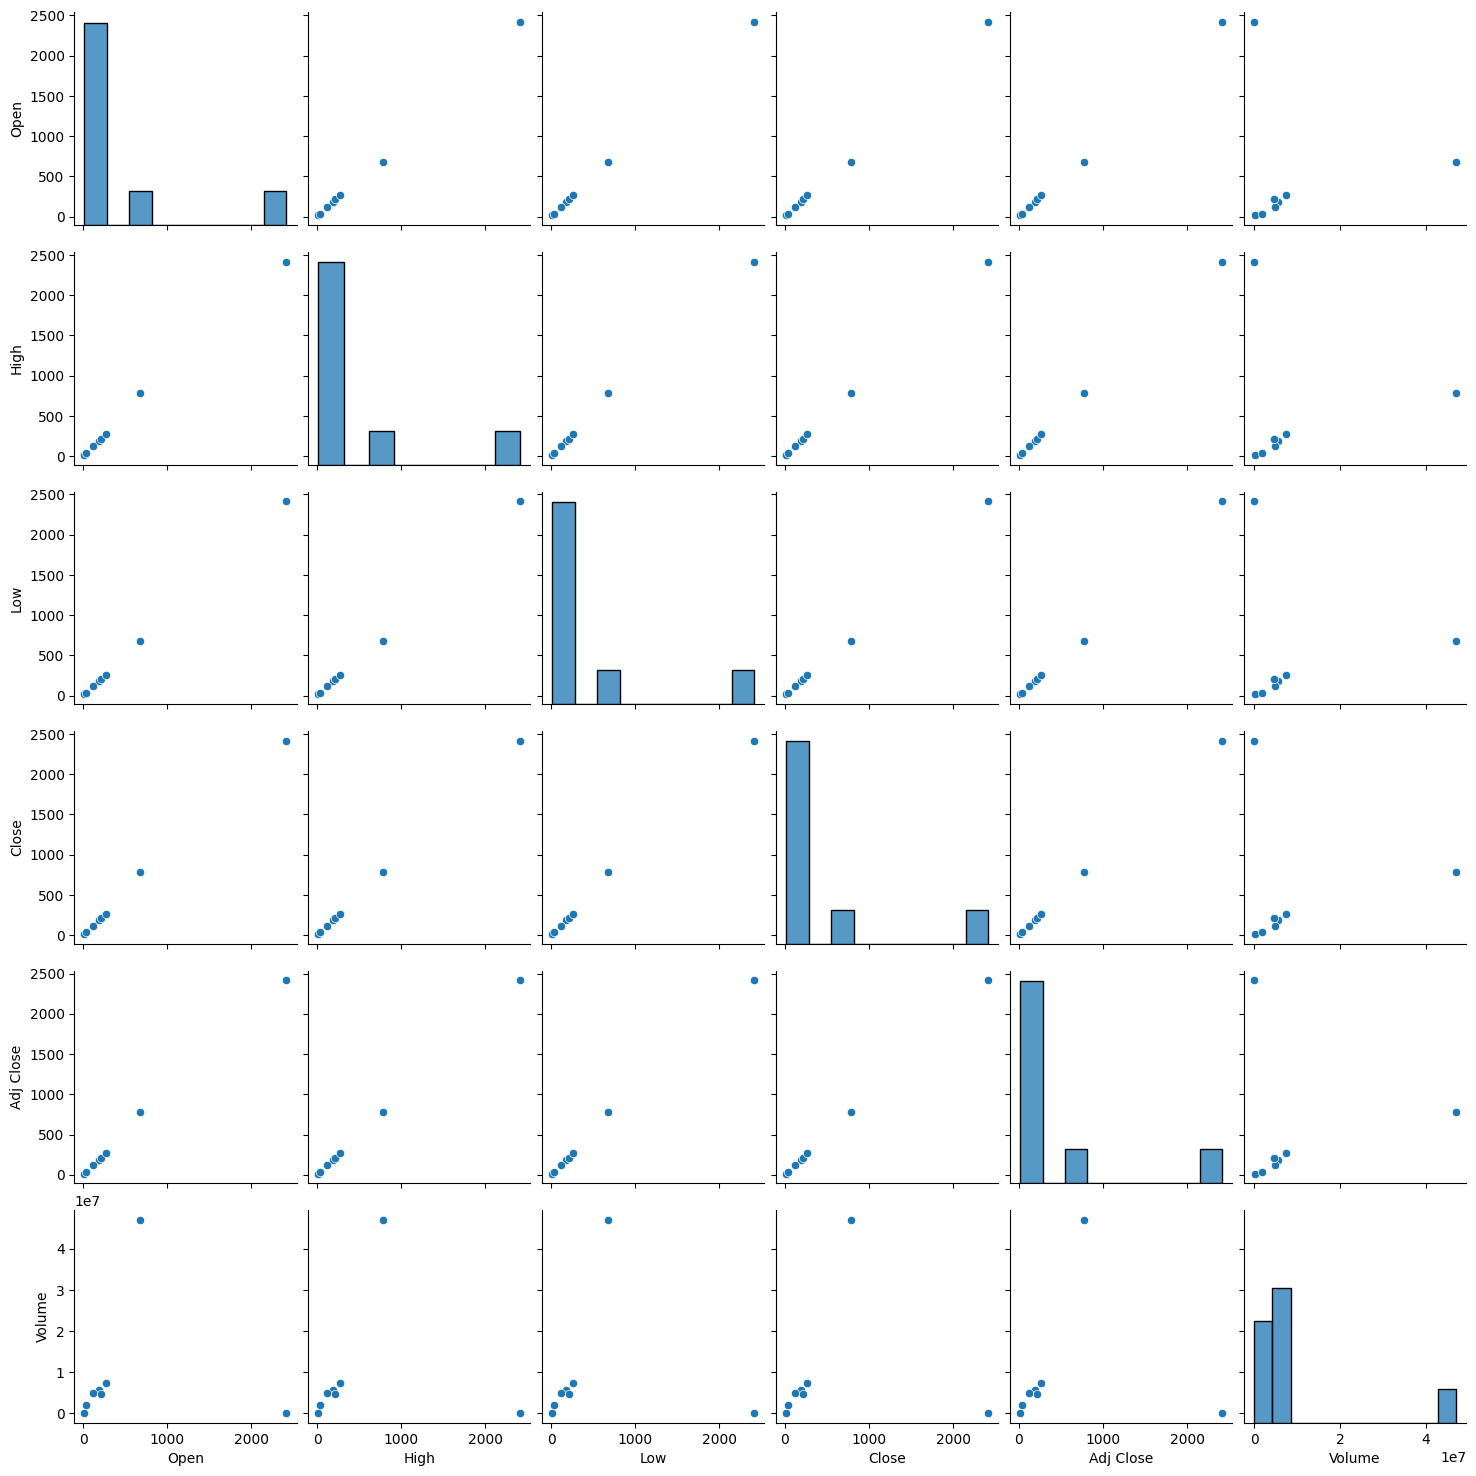

In [7]:
sn.pairplot(summarized_data)
plt.show()

In [8]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

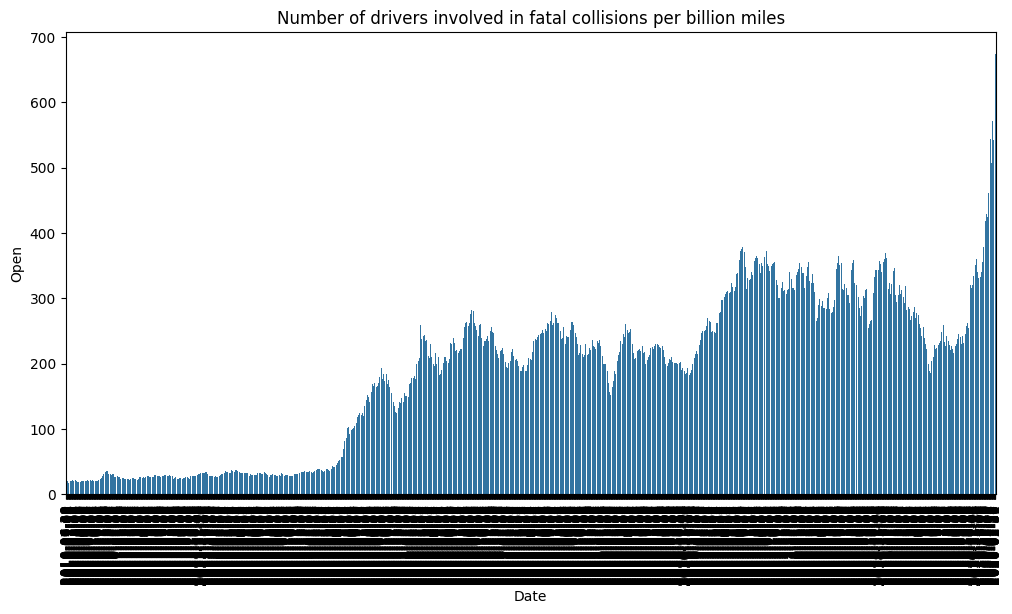

In [9]:
plt.figure(figsize=(12,6))
sn.barplot(x='Date',y='Open',data=df)
plt.xticks(rotation=90)
plt.title('Number of drivers involved in fatal collisions per billion miles')
plt.show()

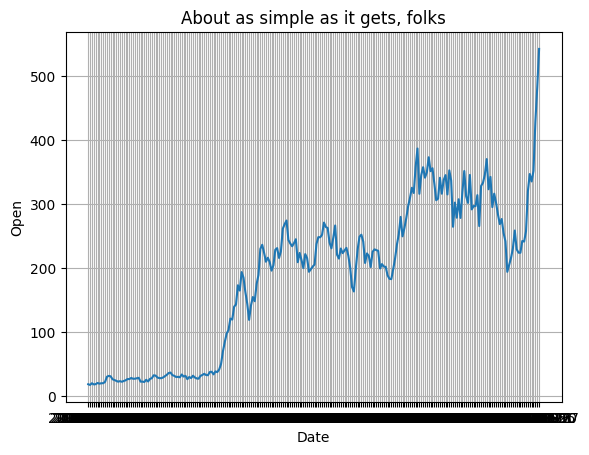

In [10]:
fig, ax = plt.subplots()
ax.plot(df["Date"][::10], df["Open"][::10])

ax.set(xlabel='Date', ylabel='Open',
       title='About as simple as it gets, folks')
ax.grid()

# fig.savefig("test.png")
plt.show()

In [11]:
df["Month"] = pd.to_datetime(df["Date"]).dt.to_period('M')
df.head()

Date       Open   High        Low      Close  Adj Close    Volume  \
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300   
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100   
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800   
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800   
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900   

     Month  
0  2010-06  
1  2010-06  
2  2010-07  
3  2010-07  
4  2010-07

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype    
---  ------     --------------  -----    
 0   Date       2416 non-null   object   
 1   Open       2416 non-null   float64  
 2   High       2416 non-null   float64  
 3   Low        2416 non-null   float64  
 4   Close      2416 non-null   float64  
 5   Adj Close  2416 non-null   float64  
 6   Volume     2416 non-null   int64    
 7   Month      2416 non-null   period[M]
dtypes: float64(5), int64(1), object(1), period[M](1)
memory usage: 151.1+ KB


In [13]:
fig = px.line(df, x='Date', y='Close', title='Tesla Stock Prices')
fig.show()


In [14]:
# import pandas as pd
# import numpy as np


# df = pd.read_csv("TSLA.csv")
# print(df.head())

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'notebook'

# Load the dataset
# file_path = '/path/to/tesla_stock_data.csv'  # Replace with the actual dataset path
file_path = "TSLA.csv"
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])  # Convert Date to datetime format

# Basic Information
print(data.info())
print(data.describe())

# Time-Series Analysis
fig = px.line(data, x='Date', y='Adj Close', title='Tesla Adjusted Closing Price Over Time')
fig.show()

# Annual Trends
data['Year'] = data['Date'].dt.year
annual_summary = data.groupby('Year').agg({'High': 'max', 'Low': 'min', 'Volume': 'mean'}).reset_index()
fig = px.bar(annual_summary, x='Year', y=['High', 'Low'], title='Annual High and Low Prices', barmode='group')
fig.show()



# Monthly Seasonality
data['Month'] = data['Date'].dt.month
data['YearMonth'] = data['Date'].dt.to_period('M').astype(str)  # Convert Period to string
monthly_avg = data.groupby(['YearMonth']).mean().reset_index()

# Plotting
fig = px.line(
    monthly_avg,
    x='YearMonth',
    y='Adj Close',
    title='Monthly Average Adjusted Closing Price',
    labels={'YearMonth': 'Year-Month', 'Adj Close': 'Adjusted Close Price'}
)
fig.update_xaxes(tickangle=45)  # Rotate x-axis labels for better readability
fig.show()




# Correlation Analysis
correlation = data.corr()
fig = px.imshow(correlation, text_auto=True, title='Correlation Heatmap')
fig.show()

# Volatility Analysis
data['Daily Change %'] = (data['Adj Close'].pct_change()) * 100
fig = px.histogram(data, x='Daily Change %', title='Daily Percentage Change Distribution', nbins=50)
fig.show()

# Highlight Significant Events
threshold = 10  # Define a threshold for significant daily changes
significant_changes = data[abs(data['Daily Change %']) > threshold]
fig = px.scatter(significant_changes, x='Date', y='Daily Change %', title='Significant Daily Percentage Changes')
fig.show()

# # Save processed data
# processed_file_path = '/path/to/processed_tesla_stock_data.csv'
# data.to_csv(processed_file_path, index=False)
# print(f"Processed data saved to {processed_file_path}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2416 non-null   datetime64[ns]
 1   Open       2416 non-null   float64       
 2   High       2416 non-null   float64       
 3   Low        2416 non-null   float64       
 4   Close      2416 non-null   float64       
 5   Adj Close  2416 non-null   float64       
 6   Volume     2416 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 132.3 KB
None
                                Date         Open         High          Low  \
count                           2416  2416.000000  2416.000000  2416.000000   
mean   2015-04-15 11:09:56.026490112   186.271147   189.578224   182.916639   
min              2010-06-29 00:00:00    16.139999    16.629999    14.980000   
25%              2012-11-19 18:00:00    34.342498    34.897501    33.587501   


ValueError: could not convert string to float: '2010-06'

In [3]:
# Correlation Analysis
numeric_columns = data.select_dtypes(include='number')  # Select only numeric columns
correlation = numeric_columns.corr()

# Plotting the Correlation Heatmap
fig = px.imshow(
    correlation,
    text_auto=True,
    title='Correlation Heatmap',
    labels={'color': 'Correlation'},
)
fig.show()


In [4]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(
    x=data['Date'],
    open=data['Open'],
    high=data['High'],
    low=data['Low'],
    close=data['Close']
)])
fig.update_layout(title='Tesla Stock Candlestick Chart', xaxis_title='Date', yaxis_title='Price')
fig.show()


In [5]:
data['SMA_50'] = data['Adj Close'].rolling(window=50).mean()
data['SMA_200'] = data['Adj Close'].rolling(window=200).mean()

fig = px.line(data, x='Date', y=['Adj Close', 'SMA_50', 'SMA_200'], title='Tesla Stock Prices with Moving Averages')
fig.update_layout(legend_title_text='Metrics', xaxis_title='Date', yaxis_title='Price')
fig.show()


In [8]:
fig = px.bar(data, x='Date', y='Volume', title='Tesla Trading Volume Over Time', labels={'Volume': 'Trading Volume'})
fig.show()


In [9]:
fig = px.scatter(data, x='Volume', y='Adj Close', title='Volume vs Adjusted Close Price', labels={'Adj Close': 'Adjusted Close Price', 'Volume': 'Trading Volume'})
fig.show()


In [10]:
data['Month'] = data['Date'].dt.month
monthly_avg = data.groupby('Month')['Adj Close'].mean().reset_index()

fig = px.bar(monthly_avg, x='Month', y='Adj Close', title='Average Adjusted Close Price by Month', labels={'Adj Close': 'Adjusted Close Price', 'Month': 'Month'})
fig.show()


In [11]:
data['Year'] = data['Date'].dt.year
yearly_avg = data.groupby('Year')['Adj Close'].mean().reset_index()

fig = px.line(yearly_avg, x='Year', y='Adj Close', title='Yearly Average Adjusted Close Price', labels={'Adj Close': 'Adjusted Close Price', 'Year': 'Year'})
fig.show()


In [12]:
data['Daily Change (%)'] = data['Adj Close'].pct_change() * 100

fig = px.line(data, x='Date', y='Daily Change (%)', title='Daily Percentage Change in Adjusted Close Price', labels={'Daily Change (%)': 'Percentage Change'})
fig.show()


In [13]:
fig = px.box(data, y='Daily Change (%)', title='Distribution of Daily Percentage Changes')
fig.show()


In [14]:
max_price = data.loc[data['Adj Close'].idxmax()]
min_price = data.loc[data['Adj Close'].idxmin()]

fig = px.line(data, x='Date', y='Adj Close', title='Tesla Stock Prices with Highs and Lows')
fig.add_annotation(x=max_price['Date'], y=max_price['Adj Close'], text="Highest Price", showarrow=True, arrowhead=2)
fig.add_annotation(x=min_price['Date'], y=min_price['Adj Close'], text="Lowest Price", showarrow=True, arrowhead=2)
fig.show()


In [15]:
fig = px.line(data, x='Date', y='Adj Close', title='Tesla Stock Prices (Logarithmic Scale)')
fig.update_yaxes(type='log', title='Log Scale Price')
fig.show()


In [15]:
df.head()

Date       Open   High        Low      Close  Adj Close    Volume  \
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300   
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100   
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800   
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800   
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900   

     Month  
0  2010-06  
1  2010-06  
2  2010-07  
3  2010-07  
4  2010-07

In [24]:
# final analysis
df = pd.read_csv('TSLA.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['Daily_Return'] = df['Close'].pct_change()
df['Volatility'] = df['Daily_Return'].rolling(window=20).std() * np.sqrt(252)
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['Upper_BB'] = df['SMA_20'] + (df['Close'].rolling(window=20).std() * 2)
df['Lower_BB'] = df['SMA_20'] - (df['Close'].rolling(window=20).std() * 2)

In [27]:
latest_price = df['Close'].iloc[-1]
price_change = df['Close'].iloc[-1] - df['Close'].iloc[-2]
price_change_pct = (price_change / df['Close'].iloc[-2]) * 100
volatility = df['Volatility'].iloc[-1] * 100
latest_price, price_change, price_change_pct, volatility


(np.float64(780.0),
 np.float64(129.42999299999997),
 np.float64(19.89486013916408),
 np.float64(86.84848375130262))

In [29]:
fig = px.area(df, y='Close', 
                title='Tesla Stock Price',
                template='plotly_dark')
fig.update_layout(
    yaxis_title="Price (USD)",
    hovermode='x unified'
)

In [32]:
fig = go.Figure(data=[go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close']
)])
fig.update_layout(
    title='Tesla Stock Price',
    yaxis_title='Price (USD)',
    template='plotly_dark',
    xaxis_rangeslider_visible=False
)

In [33]:
fig = px.line(df, y='Close',
                title='Tesla Stock Price with Markers',
                template='plotly_dark')
fig.add_scatter(x=df.index, y=df['Close'],
                mode='markers', name='Daily Points')


In [34]:
fig = go.Figure(data=[go.Ohlc(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close']
)])
fig.update_layout(
    title='Tesla Stock Price',
    yaxis_title='Price (USD)',
    template='plotly_dark',
    xaxis_rangeslider_visible=False
)

In [36]:
fig_ma = go.Figure()
fig_ma.add_trace(go.Scatter(x=df.index, y=df['Close'],
                            name='Close Price', line=dict(color='#00b4d8')))


In [45]:
rsi_period = st.slider('RSI Period', 5, 30, 14)
delta = df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=rsi_period).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=rsi_period).mean()
rs = gain / loss
rsi = 100 - (100 / (1 + rs))
fig_rsi = go.Figure()
fig_rsi.add_trace(go.Scatter(x=df.index, y=rsi, name='RSI',
                            line=dict(color='#00b4d8')))
fig_rsi.add_hline(y=70, line_dash="dash", line_color="red", annotation_text="Overbought")
fig_rsi.add_hline(y=30, line_dash="dash", line_color="green", annotation_text="Oversold")
fig_rsi.update_layout(
    title='RSI Analysis',
    template='plotly_dark',
    height=400,
    yaxis=dict(range=[0, 100])
)

2025-01-07 23:09:13.747 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 23:09:13.749 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 23:09:13.751 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 23:09:13.753 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 23:09:14.291 
  command:

    streamlit run c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-01-07 23:09:14.292 Thread 'MainThread': missing ScriptRunContext! This

In [46]:
fig_bb = go.Figure()
fig_bb.add_trace(go.Scatter(x=df.index, y=df['Close'], name='Close Price'))
fig_bb.add_trace(go.Scatter(x=df.index, y=df['Upper_BB'], name='Upper BB',
                           line=dict(dash='dash')))
fig_bb.add_trace(go.Scatter(x=df.index, y=df['Lower_BB'], name='Lower BB',
                           line=dict(dash='dash')))
fig_bb.update_layout(title='Bollinger Bands', template='plotly_dark')

In [48]:
fig_vol = make_subplots(specs=[[{"secondary_y": True}]])
fig_vol.add_trace(go.Bar(
    x=df.index,
    y=df['Volume'],
    name='Volume',
    marker_color='rgba(0, 180, 216, 0.5)'
), secondary_y=False)
fig_vol.add_trace(go.Scatter(
    x=df.index,
    y=df['Volume'].rolling(window=20).mean(),
    name='20-day Average Volume',
    line=dict(color='orange')
), secondary_y=True)
fig_vol.update_layout(
    title='Trading Volume Analysis',
    template='plotly_dark',
    hovermode='x unified'
)

In [50]:
fig_vol = px.line(df['Volatility'],
                  title='Historical Volatility (20-day)',
                  template='plotly_dark')

In [53]:
momentum_periods = [5, 10, 20, 50, 100]
momentum_data = {}

for period in momentum_periods:
    momentum_data[period] = df['Close'].diff(periods=period)

fig_momentum = go.Figure()

for period, momentum in momentum_data.items():
    fig_momentum.add_trace(go.Scatter(x=df.index, y=momentum,
                                        mode='lines', name=f'{period}-day Momentum'))

fig_momentum.update_layout(
    title='Price Momentum Analysis',
    template='plotly_dark',
    height=400,
    hovermode='x unified'
)
st.plotly_chart(fig_momentum, use_container_width=True)


2025-01-07 23:12:50.683 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 23:12:50.684 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 23:12:50.687 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 23:12:50.688 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()